# **Misinformation WordCloud**


### To generate a wordcloud of Arabic Dataset, we should consider the following: 
*   **Apply preprocessing steps that include**
1. Remove noisy symbol and characters (URL, punctuation marks, numbers,.. etc.  )
2. Remove Arabic diacritics.
3. Remove stop words such as  (على ، إلى ، في ) , (from, to , in ). we used to remove 
[List of stop word](https://github.com/Sue-Fwl/arabic-stop-words)
4. Apply Arabic normalization by replacing (أ , إ , آ  , ا )  with (ا), and replacing (ة)  with (ه).


*   **Arabic text preparation:** 
Arabic is a very special script language with two essential features:
1. It is written from right to left.
2. The characters change shape according to their surrounding characters.

Since the wordcloud library doesn’t support Arabic, we should use the Unicode bidirectional algorithm, which is implemented purely in python-bidi library , and another library arabic_reshaper to reshape Arabic characters and replace them with their correct shapes according to their surroundings.

*   **Tokenization**: tokenize each word using pyarabic library 





In [6]:
pip install python-bidi # To make an Arabic text from right to left 

In [9]:
pip install arabic_reshaper # to successfully render Arabic characters with their correct shapes according to their surroundings.

  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.1-cp37-none-any.whl size=16503 sha256=8cac1636ab098ea90958906917869c04480a6256139677459fbd61a120ba4abe
  Stored in directory: /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1
Successfully built arabic-reshaper


In [10]:
pip install pyarabic  # Python Library for Arabic's   

     |████████████████████████████████| 112kB 11.9MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.10-cp37-none-any.whl size=113324 sha256=a8229b2664c008ee5258e749371de506bb48765a9b33d605430727194f41ca76
  Stored in directory: /root/.cache/pip/wheels/10/b8/f5/b7c1a50e6efb83544844f165a9b134afe7292585465e29b61d
Successfully built pyarabic


In [14]:

from bidi.algorithm import get_display

#you have to download this packeg if you want arabic text 
import arabic_reshaper

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pyarabic.araby as araby
import re 
import numpy as np
import pandas as pd

In [15]:
tweets = pd.read_csv("MissinformationDatasetAfterPre.csv", encoding="utf-8")

In [19]:
tweets.head()

,id,full_text,label
0,1.242269e+18,سؤال تجد انسانيه الاردن جواب تجدها رئيس وزراء ...,0.0
1,1.237858e+18,مخزون يكفي اشهر شحن جوي والبري للسلع والمنتجات...,0.0
2,1.245464e+18,بمناهضتها للعدوان وجعلتهم يكتبون باسلوبهم يخدم...,0.0
3,1.237780e+18,تاجيل دراسه خميس عشان سوء احوال جويه هناجل حاج...,0.0
4,1.234689e+18,ترمب يسال تعتقد استخدمنا لقاح انفلونزا ممكن يس...,0.0


In [16]:
def reshaping(text):
    reshaped_words =arabic_reshaper.reshape(text) # reshape arabic char 
    artext = get_display(reshaped_words) # convert from right to left
    text = artext 
    return  text

In [18]:
# counting word frequencies using Counter()
def counter(text):
    cnt = Counter()
    for words in text:
        for word in words:
            cnt[word] += 1
    return cnt

In [20]:
tweets['full_text'] = tweets['full_text'].map(lambda x:  reshaping(x)) # apply reshaping on tweet

In [21]:
tweets['full_text'] = tweets['full_text'].map(lambda x:  araby.tokenize(x)) # Arabic text tokenization

In [28]:
# seperate the misinformation tweets from other to generate wordcloud for each 
misinformation= tweets[tweets["label"]==1]
other = tweets[tweets["label"]==0]

**Word frequencies for the whole dataset, misinformation, and other tweets**

In [24]:
# Word frequencies for the whole dataset
tweet_COVID = counter(tweets['full_text'] )
Dict_tweet_COVID  = dict(tweet_COVID )

In [25]:
# Word frequencies for misinformation
tweet_COVID_Mis = counter(misinformation['full_text'] )
Dict_tweet_COVID_Mis  = dict(tweet_COVID_Mis)

In [26]:
# Word frequencies for other
tweet_COVID_Other = counter(other ['full_text'] )
Dict_tweet_COVID_Other  = dict(tweet_COVID_Other)

In [42]:
# wordcloud title font 
font = {'family':  'serif',
        'color':  'black',
        'weight': 'black',
        'size': 16,
        }
# wordcloud word font
fontPathFile = "ae_AlMohanad.ttf"

In [27]:
wc = WordCloud(font_path= fontPathFile ,width=800, height=800, random_state=21, max_font_size=1500)

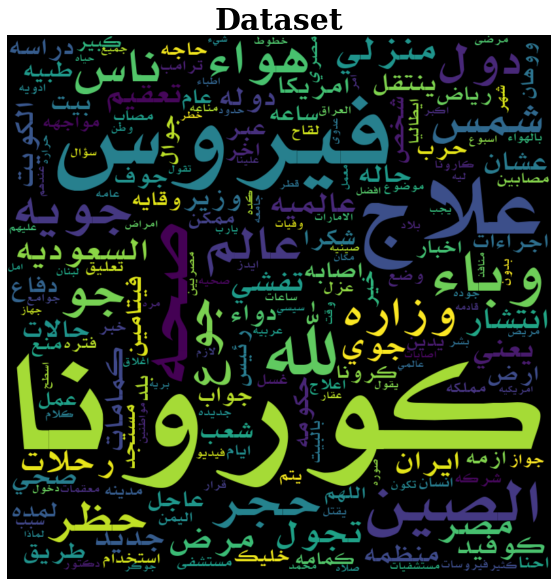

In [40]:
# Generate word cloud for All tweets in the dataset
wc.generate_from_frequencies(Dict_tweet_COVID)
# plot the WordCloud image 
plt.figure(figsize=(17, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title("Dataset",fontsize= 30, fontdict=font)
plt.savefig('WordCloudDataset.jpg',  bbox_inches='tight',dpi=300,transparent=True)
plt.show()

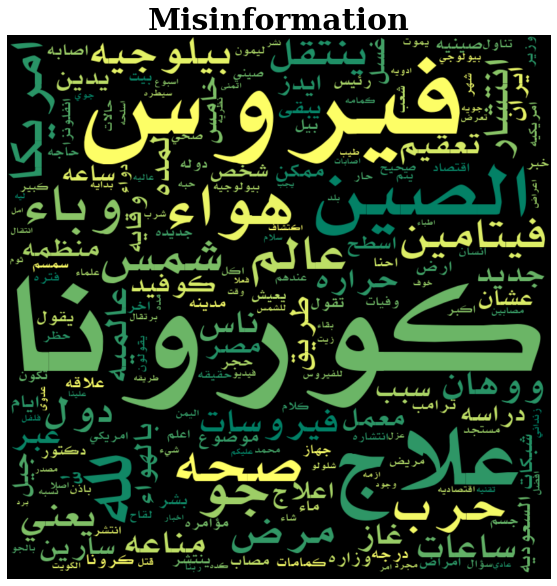

In [43]:
# wordcloud with different color 
wc_color_green = WordCloud(font_path= fontPathFile ,width=800, height=800, random_state=21, max_font_size=1500, colormap="summer")
wc_color_blue = WordCloud(font_path= fontPathFile ,width=800, height=800, random_state=21, max_font_size=1500,colormap="Blues")


# Generate word cloud for Misinformation tweets
wc_color_green.generate_from_frequencies(Dict_tweet_COVID_Mis)
# plot the WordCloud image 
plt.figure(figsize=(17, 10))
plt.imshow(wc_color_green, interpolation="bilinear")
plt.axis('off')
plt.title("Misinformation",fontsize= 30, fontdict=font)
plt.savefig('WordCloudMissinformationClass1.jpg', bbox_inches='tight',dpi=300,transparent=True)
plt.show()

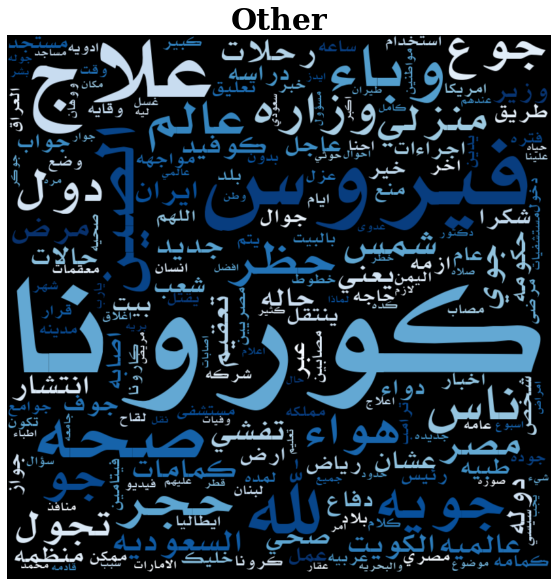

In [39]:
# Generate word cloud for other tweets
wc_color_blue.generate_from_frequencies(Dict_tweet_COVID_Other)
# plot the WordCloud image 
plt.figure(figsize=(17, 10))
plt.imshow(wc_color_blue, interpolation="bilinear")
plt.axis('off')
plt.title("Other",fontsize= 30, fontdict=font)
plt.savefig('WordCloudOtherClass0.jpg', bbox_inches='tight',dpi=300,transparent=True)
plt.show()